In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('Data_Post-processing\\df_combo_middle.csv')

In [3]:
df.head()

,Unnamed: 0,URL,Length,Hyperlinks,Phish,Url_Dots,Sus_Url
0,0,poom.co.kr,10,25.0,False,2,0
1,1,victoriarnilan.no,17,8.0,False,1,0
2,2,paqtomog.com,12,23.0,False,1,0
3,3,publications-agora.fr,21,23.0,False,1,0
4,4,funkemedien.de,14,25.0,False,1,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,URL,Length,Hyperlinks,Phish,Url_Dots,Sus_Url
0,poom.co.kr,10,25.0,False,2,0
1,victoriarnilan.no,17,8.0,False,1,0
2,paqtomog.com,12,23.0,False,1,0
3,publications-agora.fr,21,23.0,False,1,0
4,funkemedien.de,14,25.0,False,1,0


# Feature Creation

In [5]:
df['No_Hyperlink'] = (df['Hyperlinks'] == 0)
df.head()

,URL,Length,Hyperlinks,Phish,Url_Dots,Sus_Url,No_Hyperlink
0,poom.co.kr,10,25.0,False,2,0,False
1,victoriarnilan.no,17,8.0,False,1,0,False
2,paqtomog.com,12,23.0,False,1,0,False
3,publications-agora.fr,21,23.0,False,1,0,False
4,funkemedien.de,14,25.0,False,1,0,False


In [6]:
y = df.Phish
features = ['Length','Hyperlinks','Url_Dots','Sus_Url','No_Hyperlink']
#features = ['Length','Hyperlinks','Url_Dots','Sus_Url','No_Hyperlink']
X = df[features]
#train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

In [11]:
df.isnull().sum()

URL             0
Length          0
Hyperlinks      0
Phish           0
Url_Dots        0
Sus_Url         0
No_Hyperlink    0
dtype: int64

In [12]:
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
fit_model = model
fit_model.fit(train_X, train_y)

NuSVC(kernel='linear', shrinking=False)

In [13]:
val_predictions = fit_model.predict(val_X)

In [12]:
from sklearn.metrics import balanced_accuracy_score

In [9]:
def get_accuracy(thisX, thisy, model):
    train_X, val_X, train_y, val_y = train_test_split(thisX,thisy, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating Accuracy...")
    print(balanced_accuracy_score(val_y, val_predictions))

In [21]:
from sklearn.metrics import classification_report
def get_report(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating report")
    val_mae = classification_report(val_y, val_predictions)
    print(val_mae)
get_report(X,y,model)

Training Model...
Making Predictions...
Calculating report
              precision    recall  f1-score   support

       False       0.87      0.64      0.74      1661
        True       0.59      0.84      0.69      1004

    accuracy                           0.72      2665
   macro avg       0.73      0.74      0.71      2665
weighted avg       0.76      0.72      0.72      2665



In [16]:
get_accuracy(X,y,model)

Training Model...
Making Predictions...
Calculating Accuracy...
0.7685474237906891


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
def get_matrix(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating matrix...")
    val_mae = ConfusionMatrixDisplay.from_predictions(val_y, val_predictions)
    print(val_mae)

In [25]:
get_matrix(X,y,model)

Training Model...
Making Predictions...
Calculating matrix...


TypeError: ConfusionMatrixDisplay.from_predictions() got an unexpected keyword argument 'classes'

God Damn!! Over 95% accurate. Time to celebrate

Training Model...
Making Predictions...
Calculating matrix...


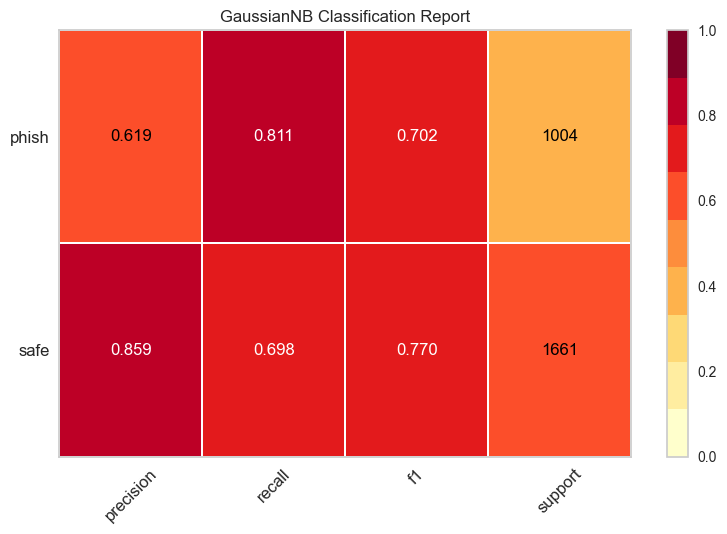

In [26]:
from yellowbrick.classifier import ClassificationReport
def get_matrix_adv(X, y, model):
    
    classes = ["safe","phish"]
    visualizer = ClassificationReport(
        model, classes=classes, support=True)
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    visualizer.fit(train_X, train_y)
    print("Making Predictions...")
    visualizer.score(val_X,val_y)
    print("Calculating matrix...")
    visualizer.show()
    
get_matrix_adv(X,y,model)

In [51]:
pickle.dump(fit_model, open("model_16_02.pkl","wb"))

In [7]:
features = ['Length','Hyperlinks','Url_Dots']
#features_2.remove('digits')
#features_2.remove('digit_ratio')
print(features)

['Length', 'Hyperlinks', 'Url_Dots']


In [13]:
X = df[features]
model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
get_accuracy(X,y,model)

Training Model...
Making Predictions...
Calculating Accuracy...
0.7394147072156887


In [14]:
from sklearn.metrics import precision_score
def get_precision(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating precision...")
    val_mae = precision_score(val_y, val_predictions)
    print(val_mae)

In [15]:
get_precision(X,y,model)

Training Model...
Making Predictions...
Calculating precision...
0.5852470424495476


In [20]:
features = ['Length','Hyperlinks','Url_Dots']
X = df[features]
get_precision(X,y,model)

Training Model...
Making Predictions...
Calculating precision...
0.5852470424495476


In [17]:
df.shape

(10659, 7)